In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from pandasql import sqldf
from profile_reader import ProfileReader

pd.options.display.max_rows = 500
pd.options.display.max_columns = 300
%matplotlib inline

pqry = lambda q: sqldf(q, globals())

In [13]:
pr = ProfileReader(data_file='data\\Final_Berg JBS 2013 Supplemental Table 3_For SVM14Dec2017.xlsx',  
                       mechanism_file='data\\Final_Berg JBS 2013 Supplemental Table 3_For SVM14Dec2017 - Mechanisms.xlsx')
# read in data. Make column 2-level index, level 0 is system, level 1 ir readout
# row indices are mechanism, agent, concentration
data = pr.parse_profiles()

# Impute missing
grouped = data.groupby(data.index.get_level_values(0).values)
f = lambda x: x.fillna(x.mean())
data = grouped.transform(f)

In [14]:
data.columns = [':'.join(col).strip() for col in data.columns.values]

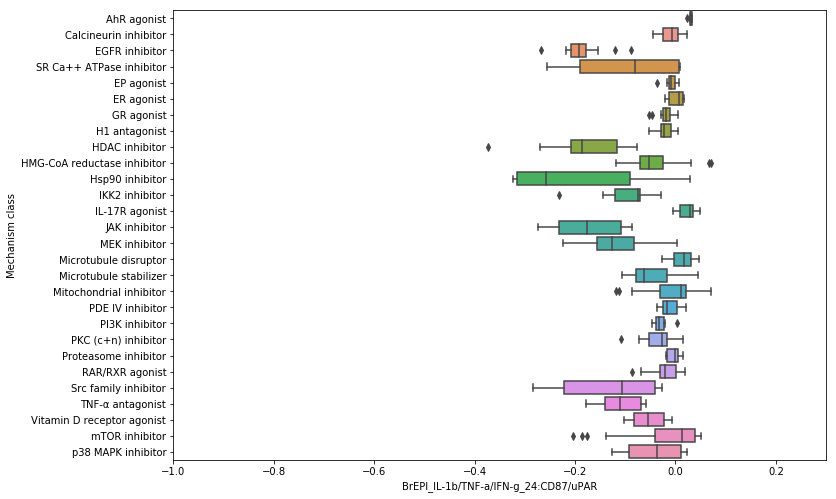

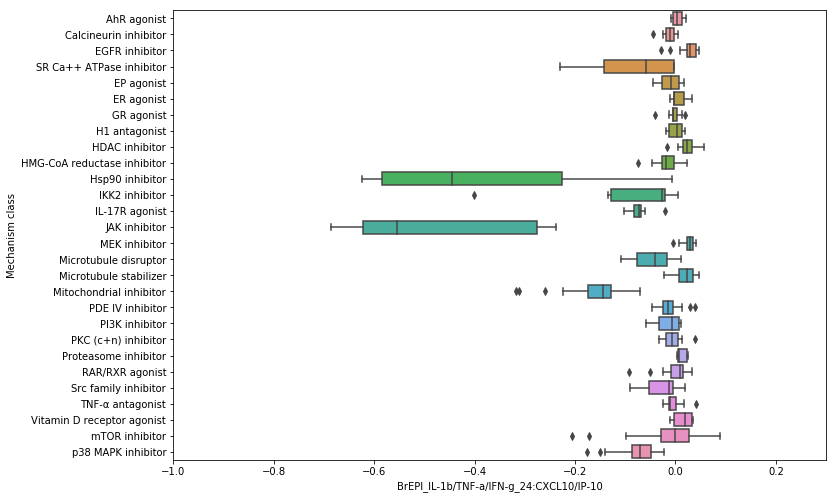

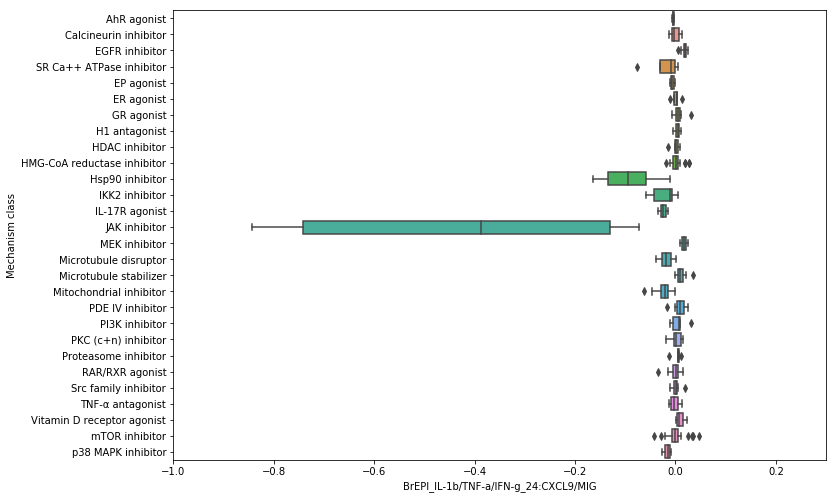

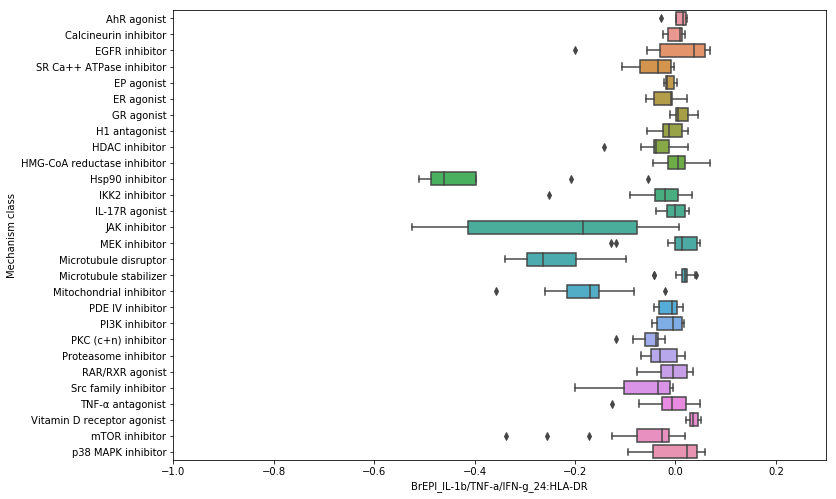

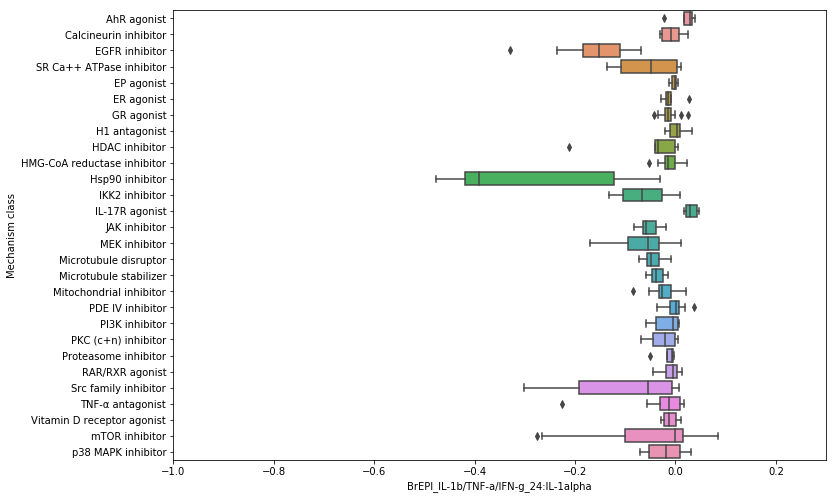

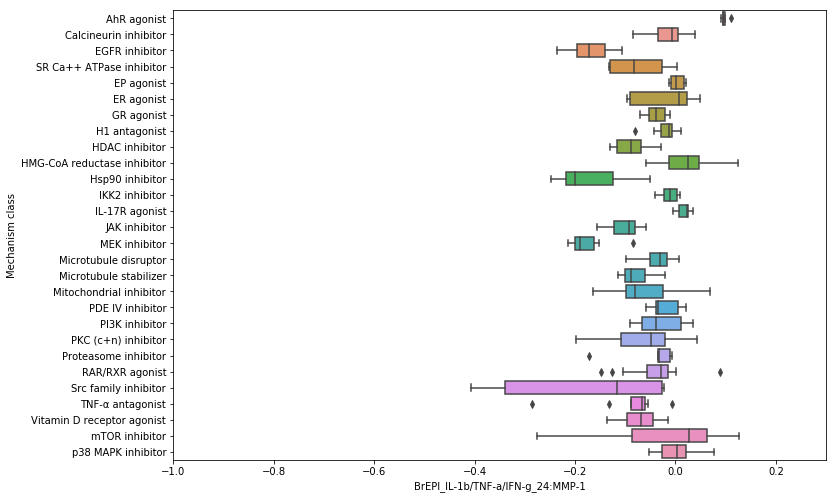

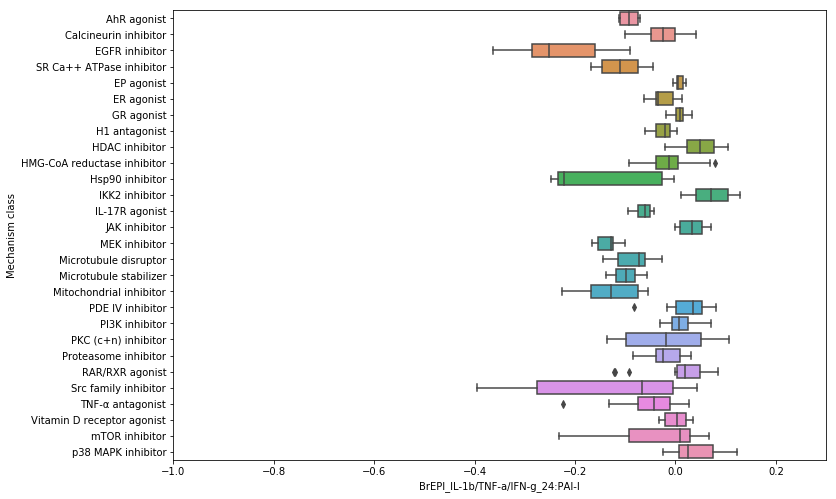

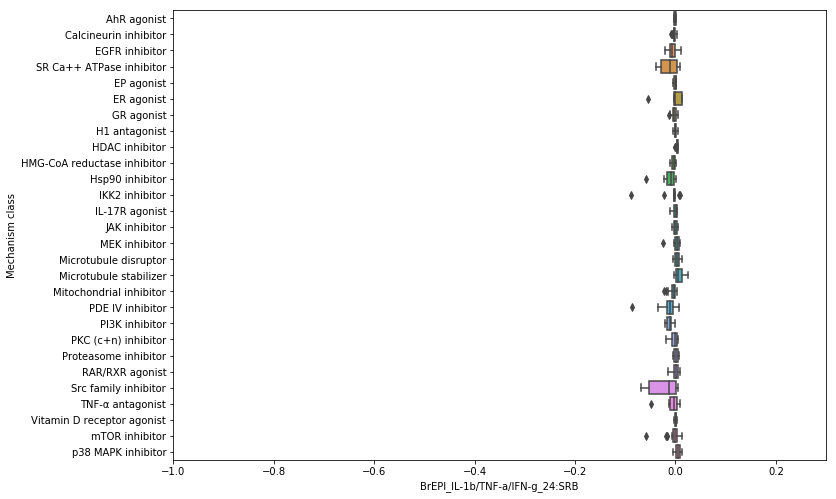

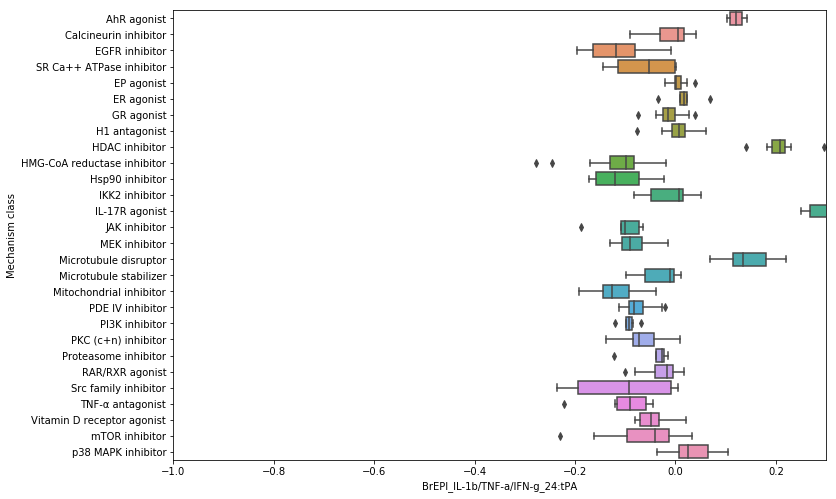

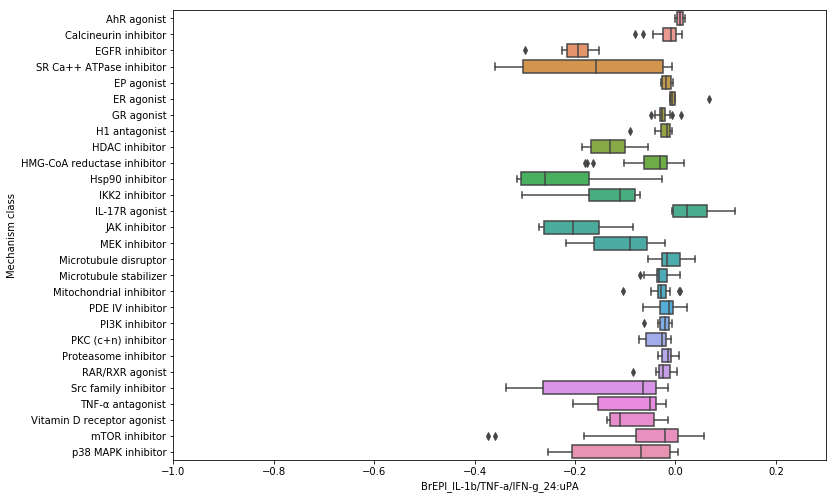

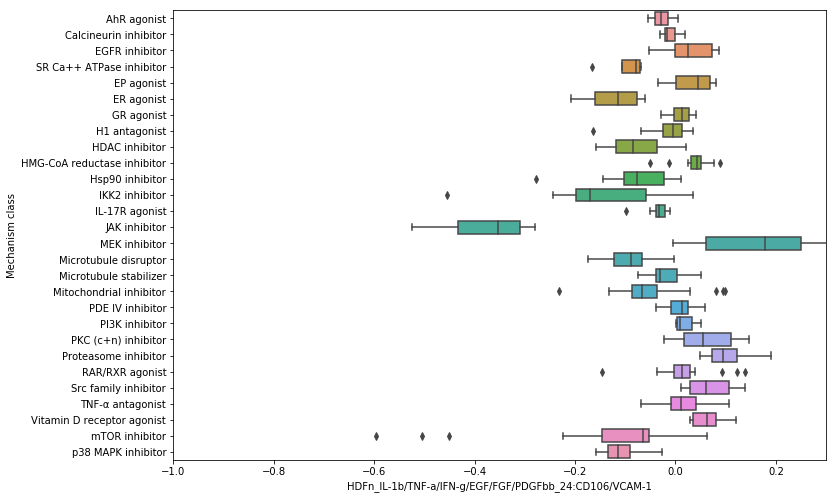

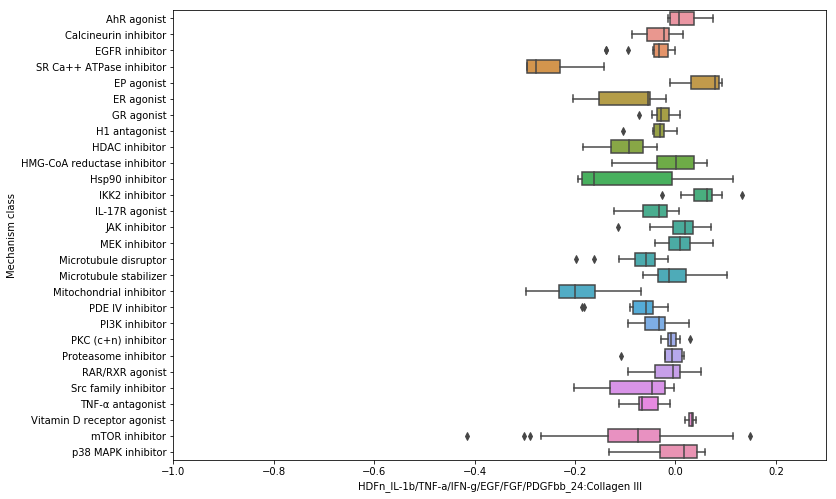

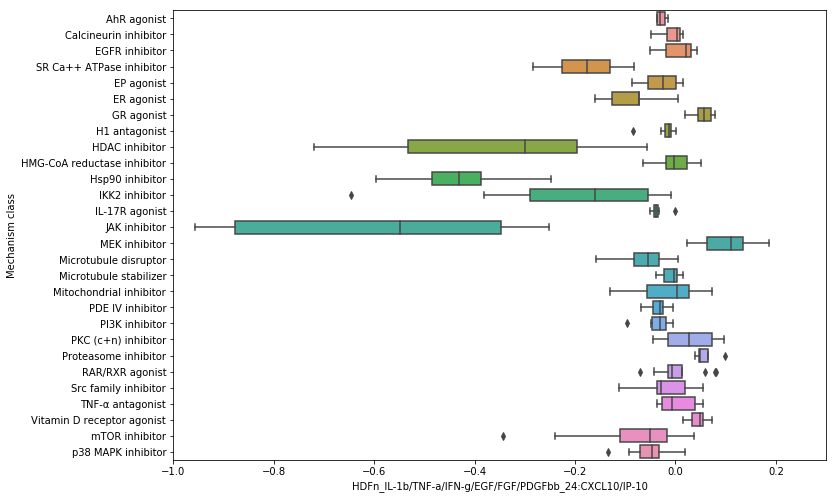

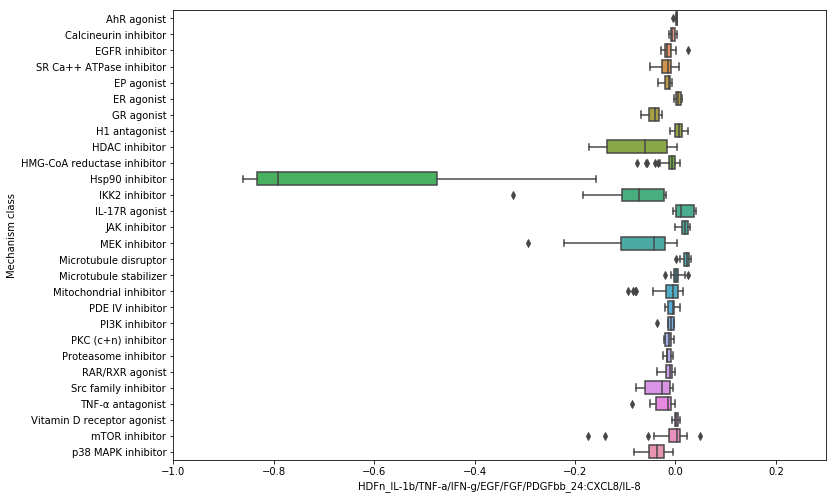

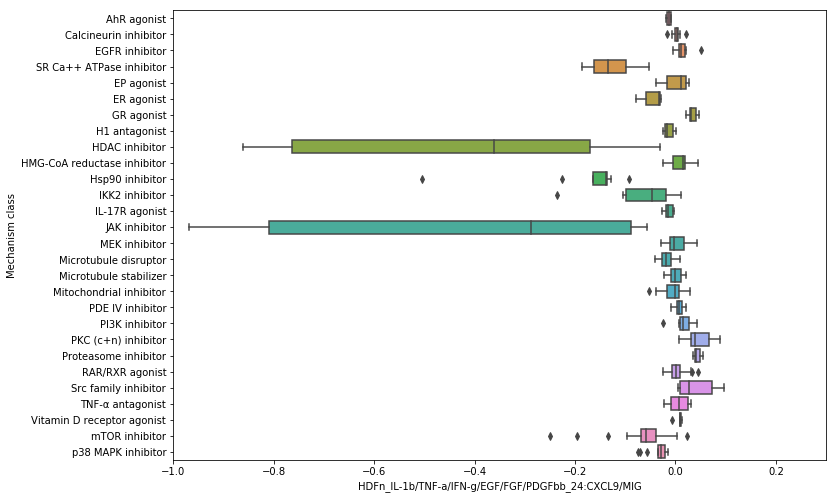

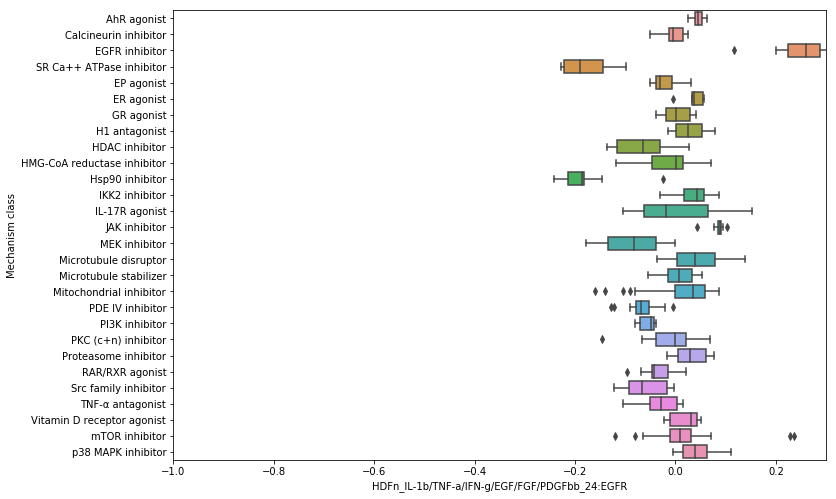

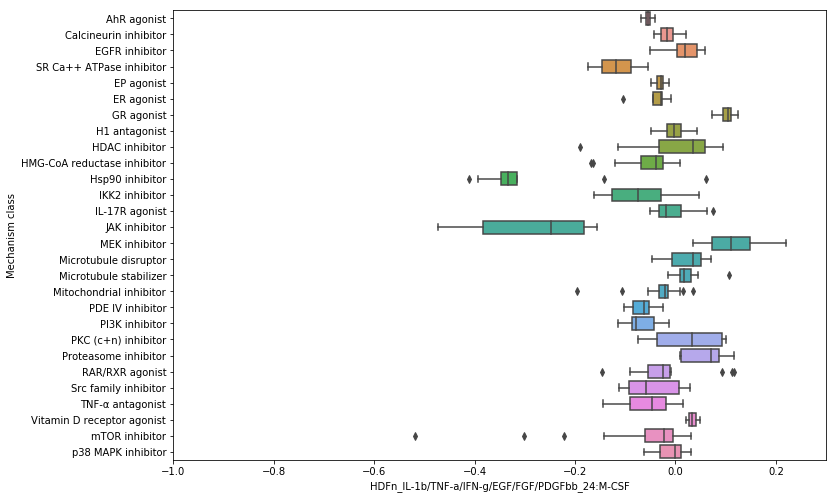

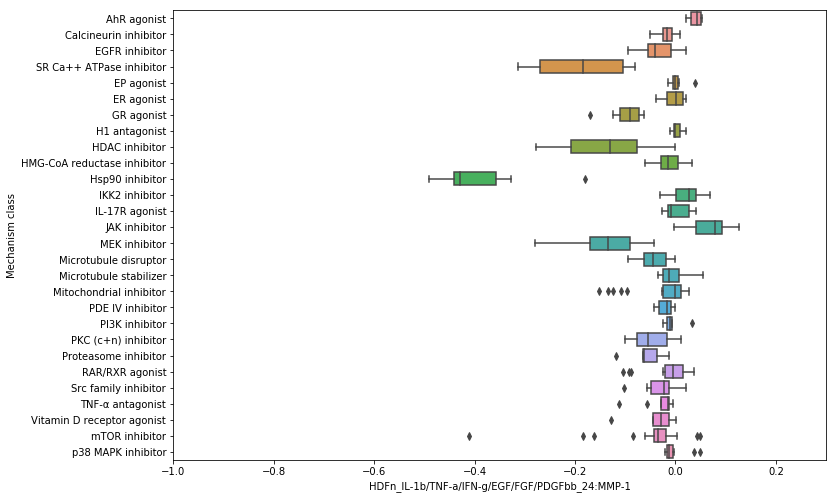

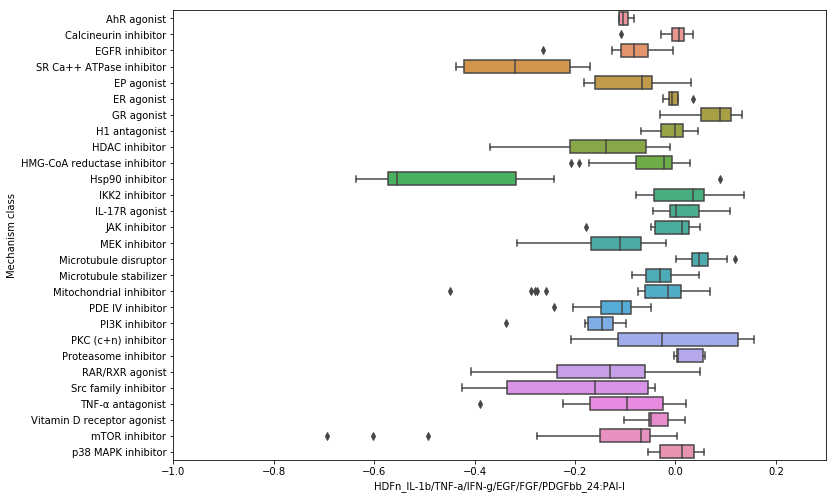

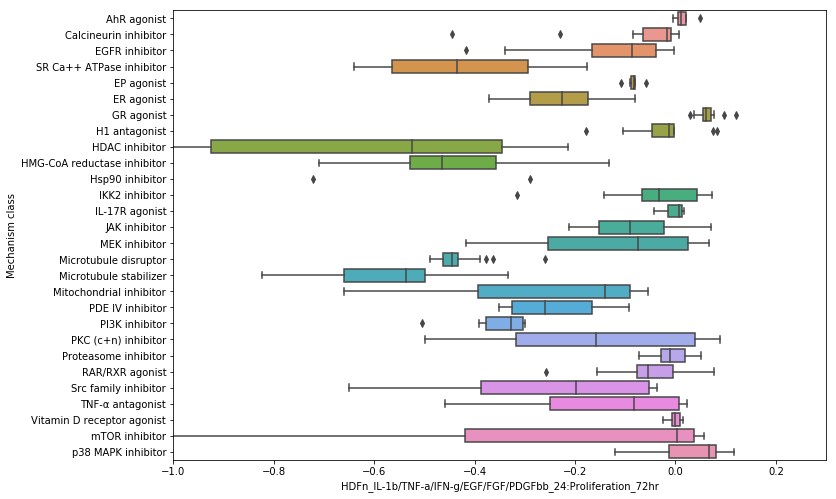

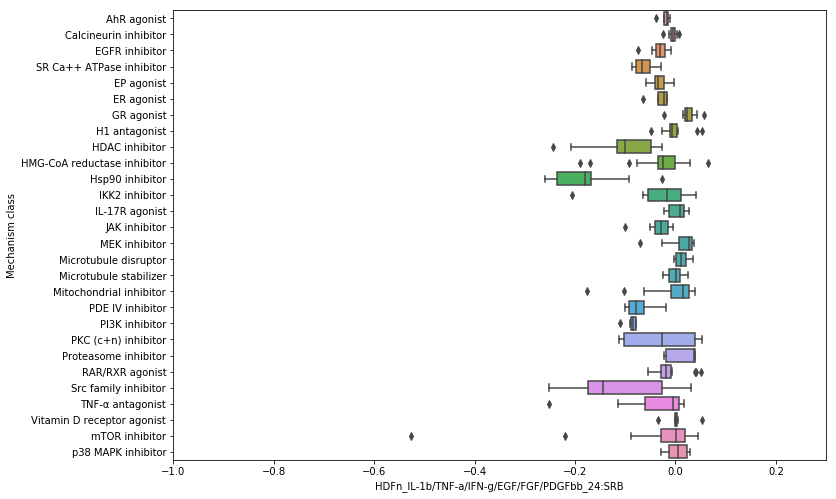

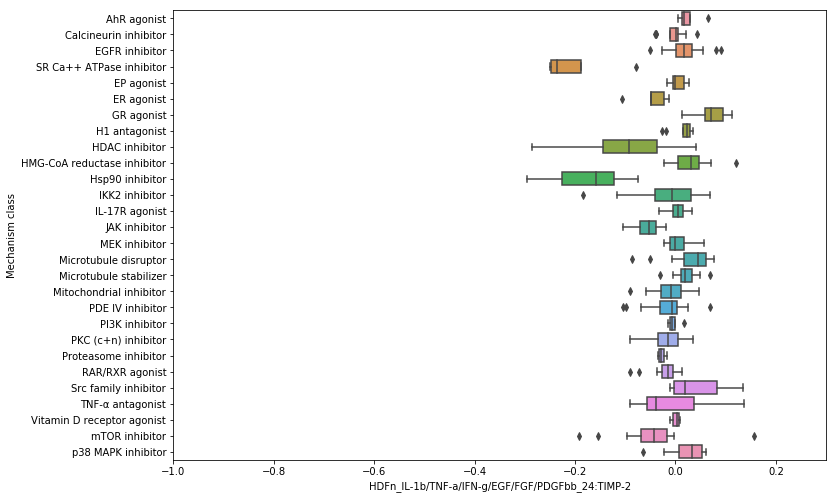

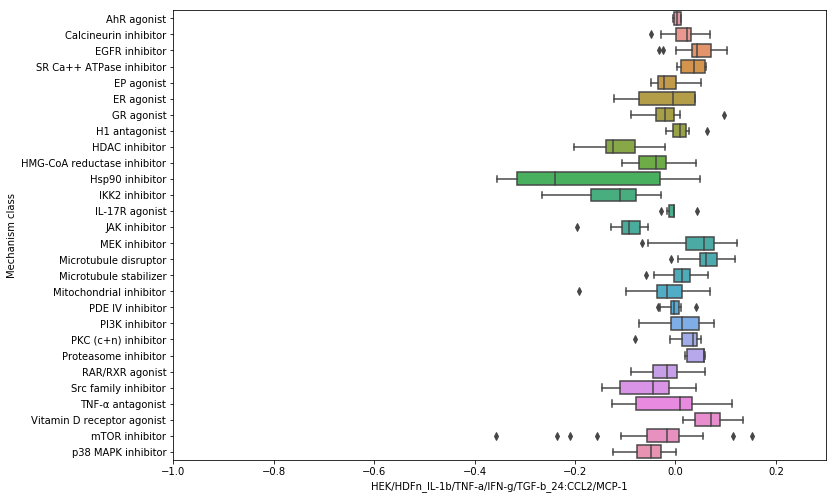

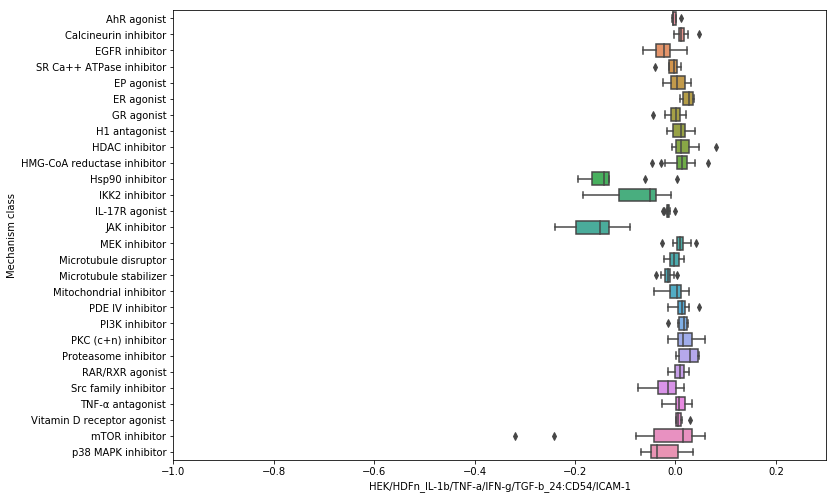

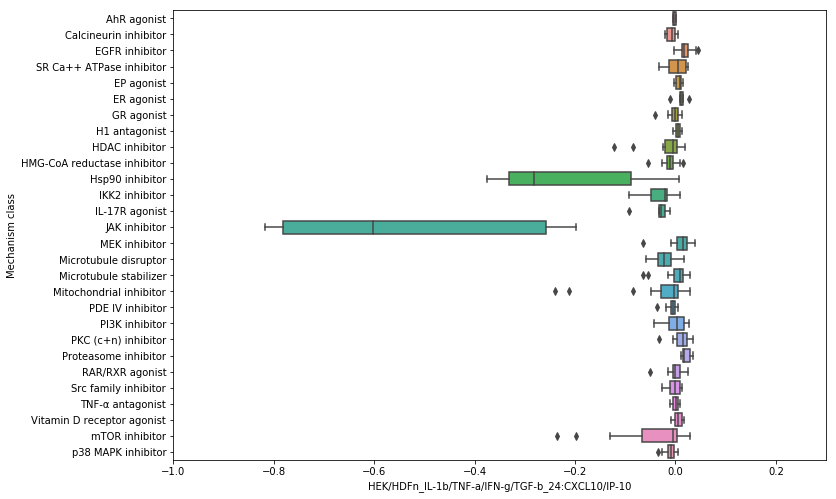

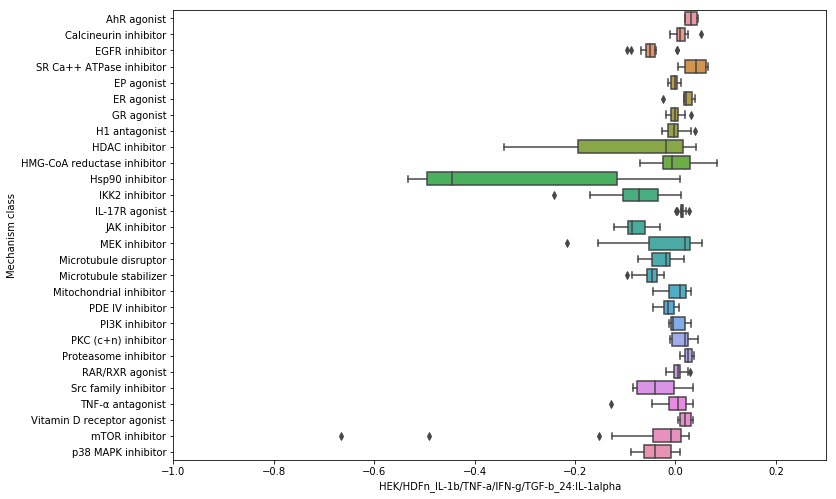

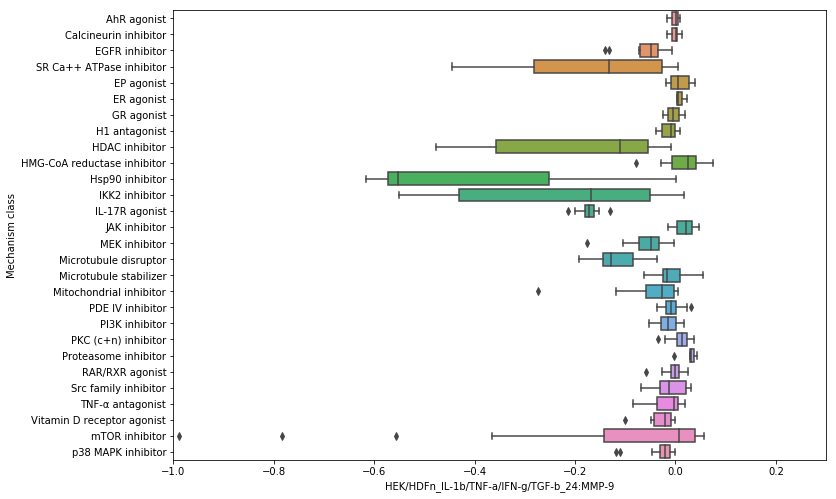

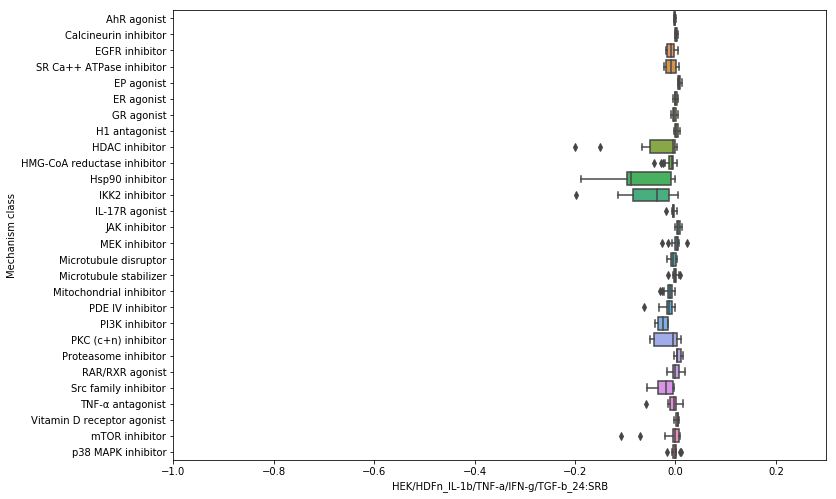

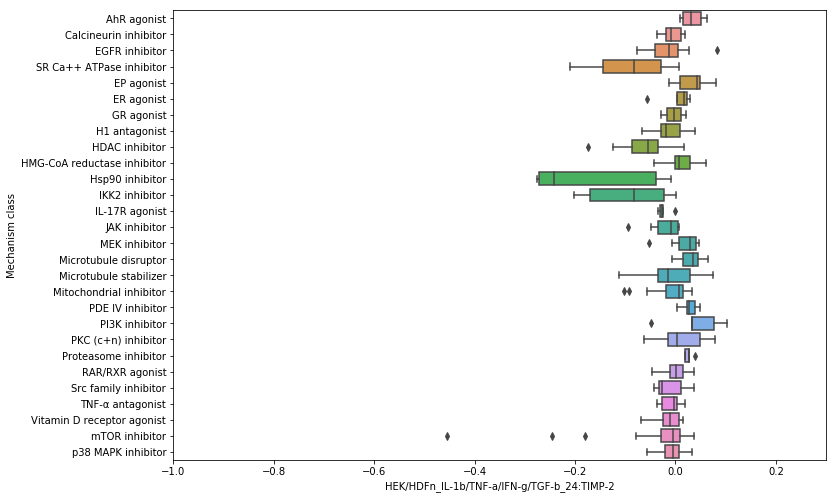

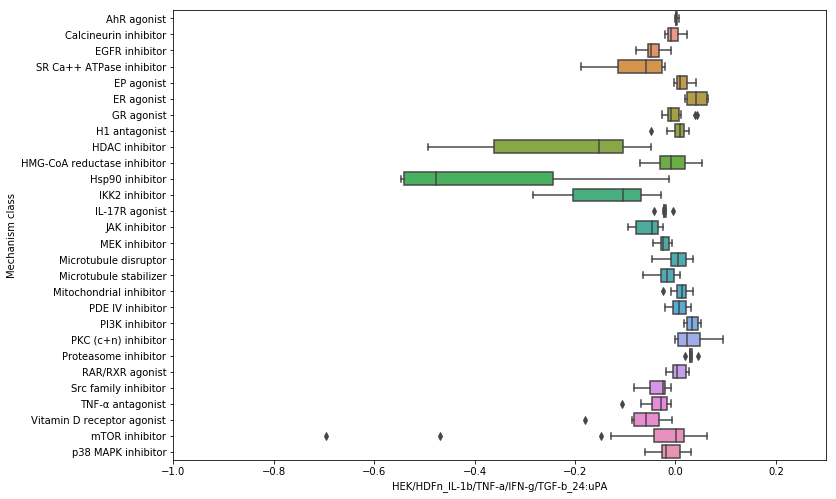

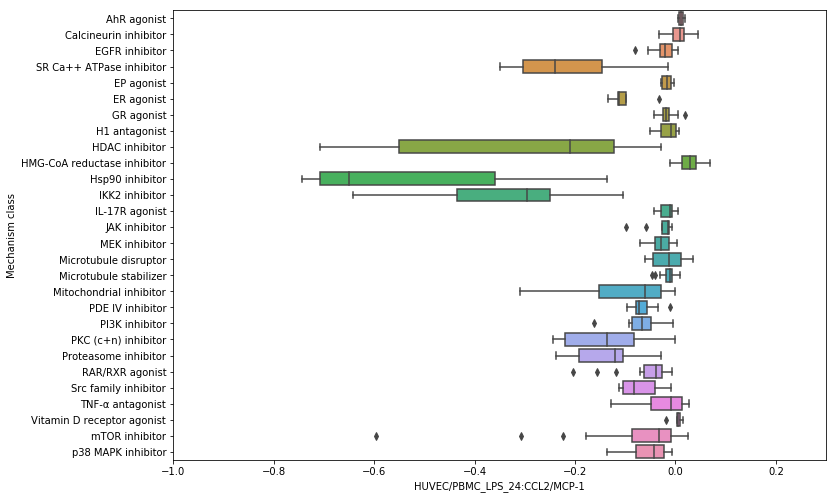

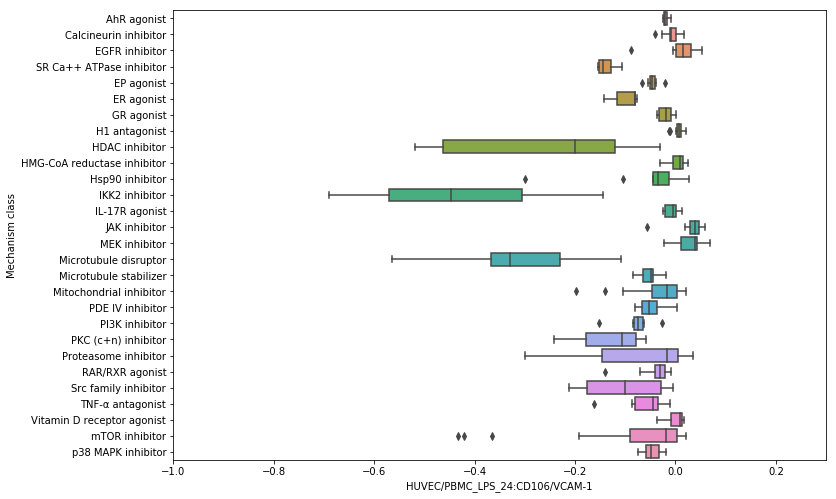

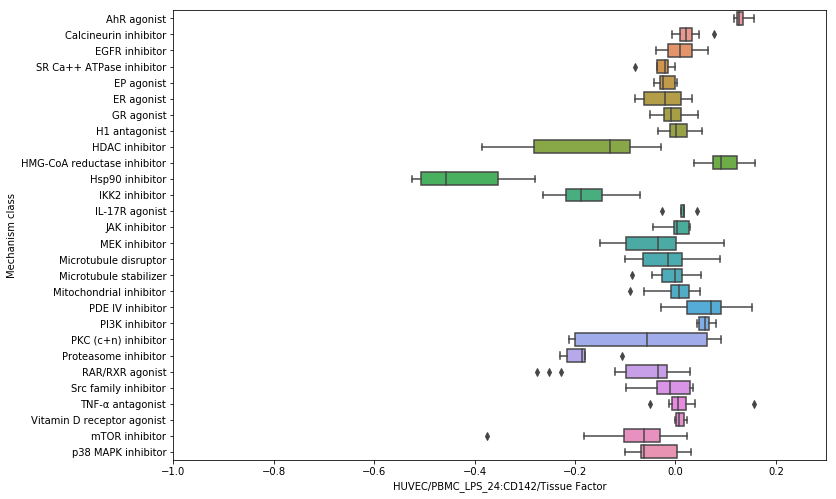

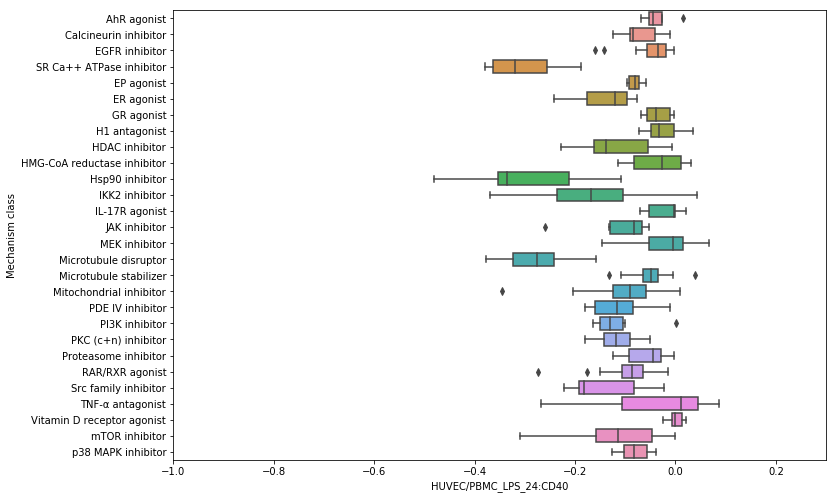

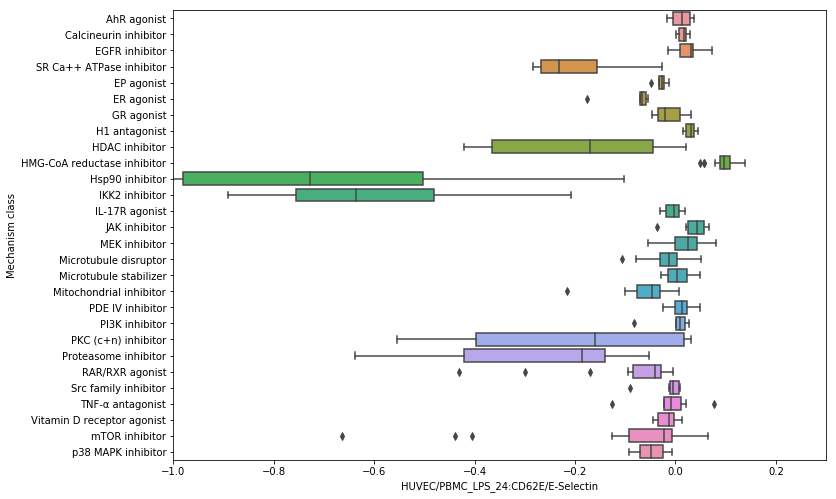

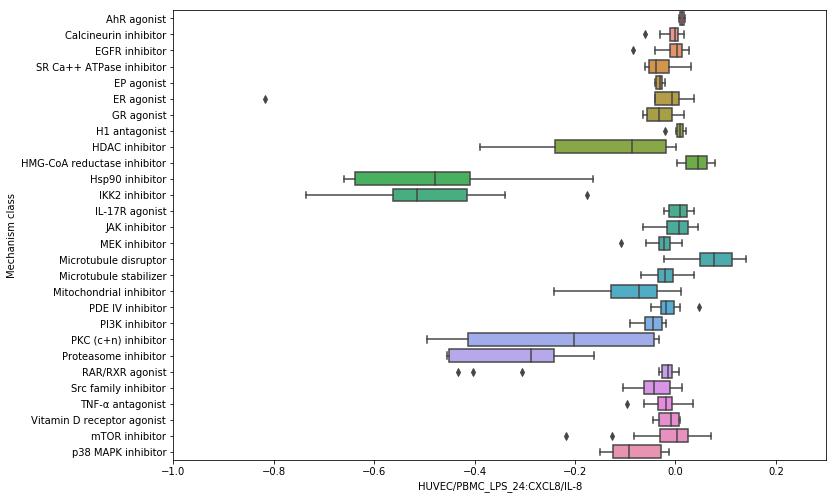

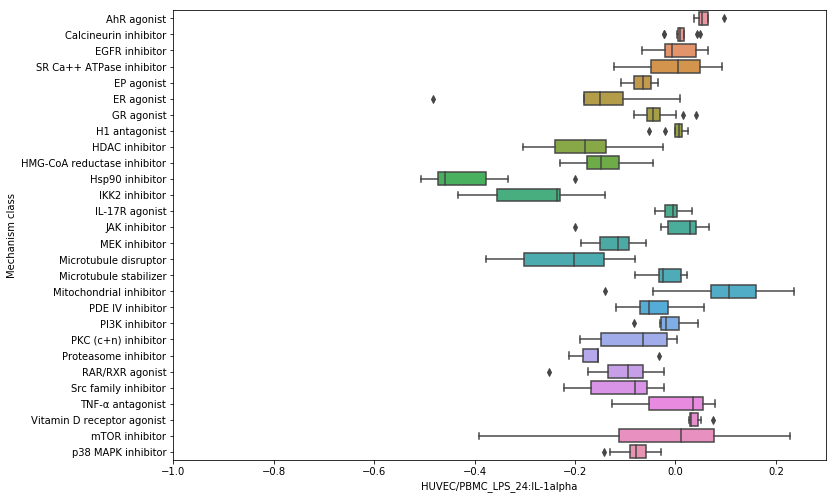

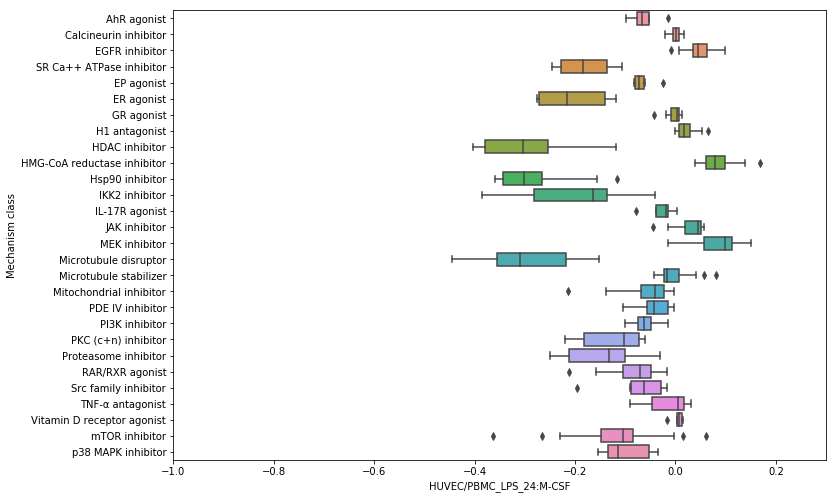

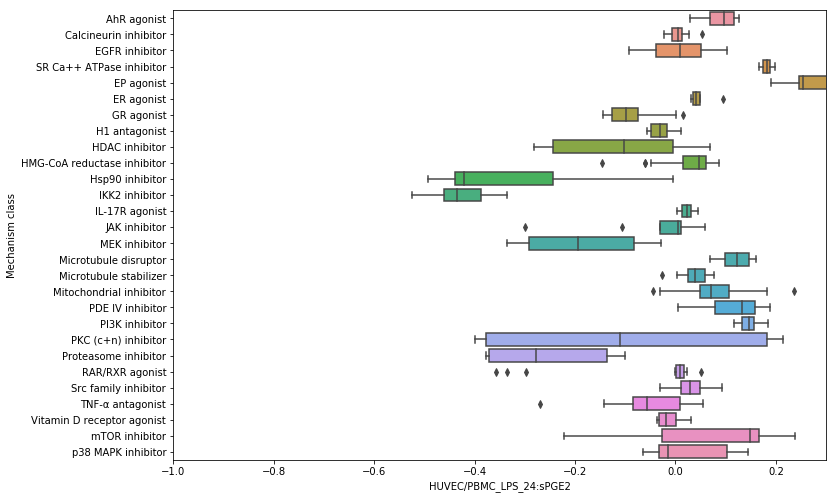

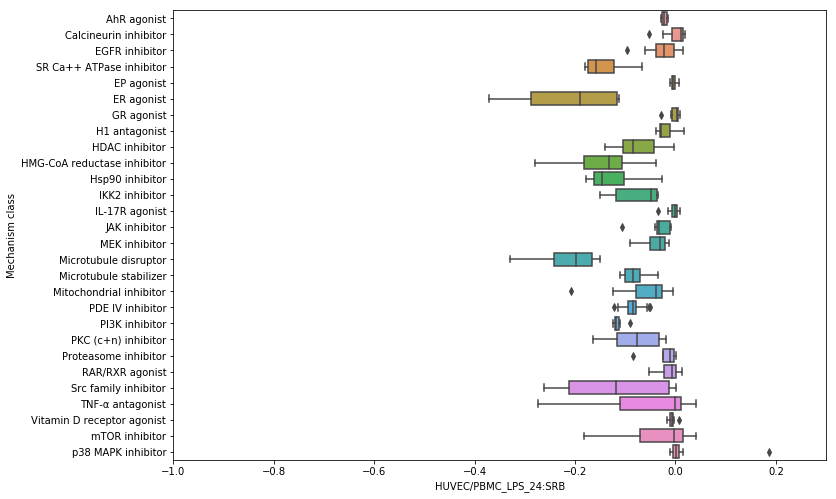

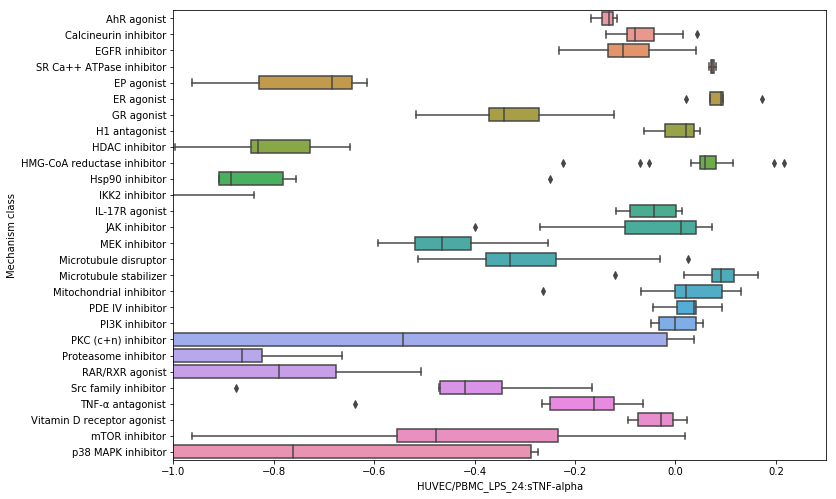

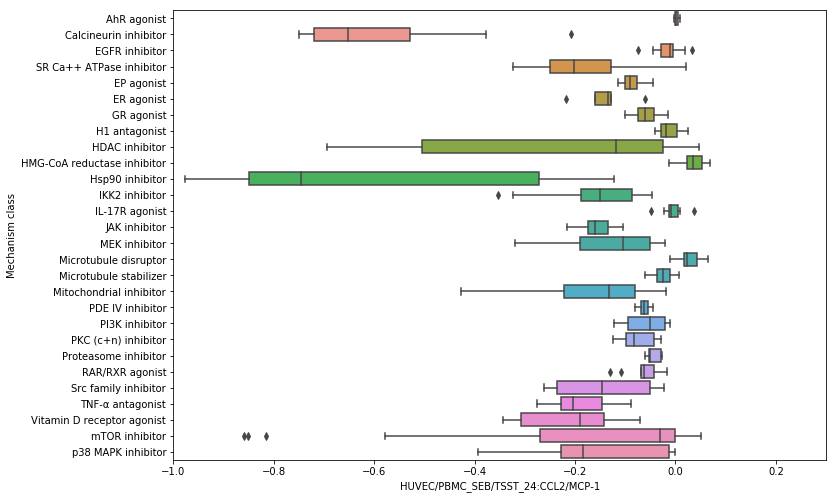

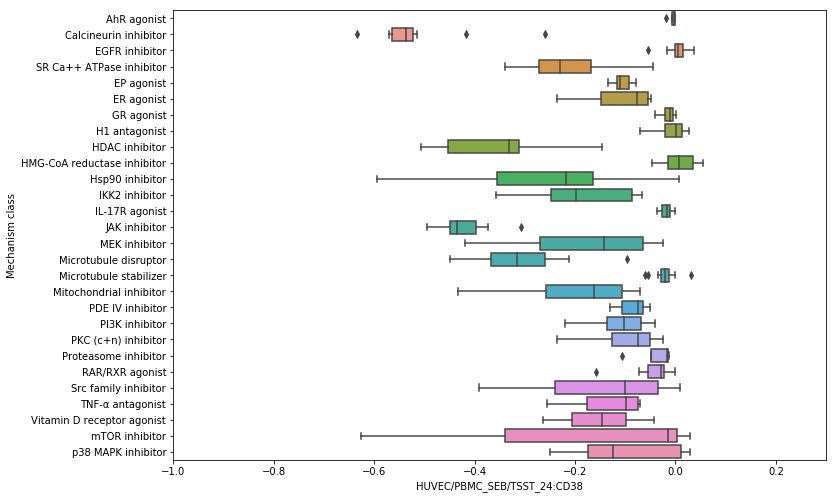

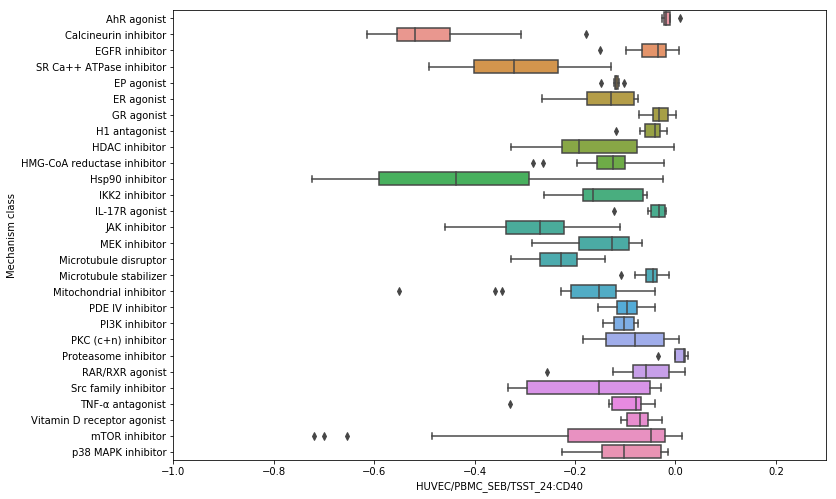

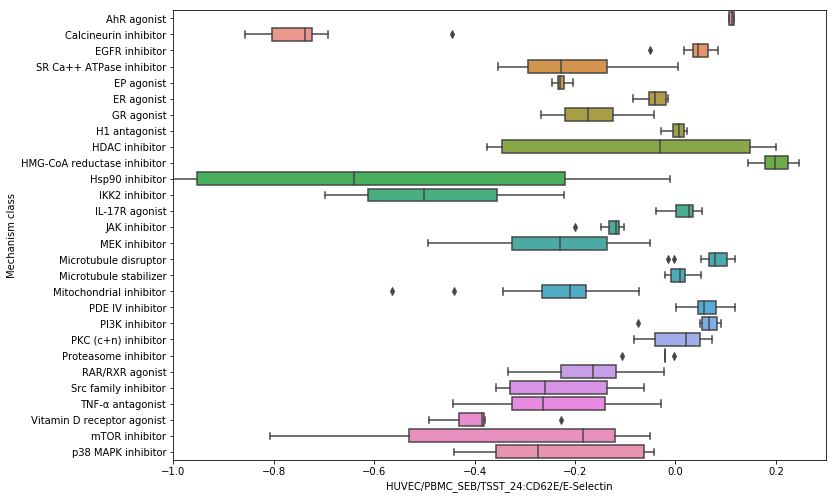

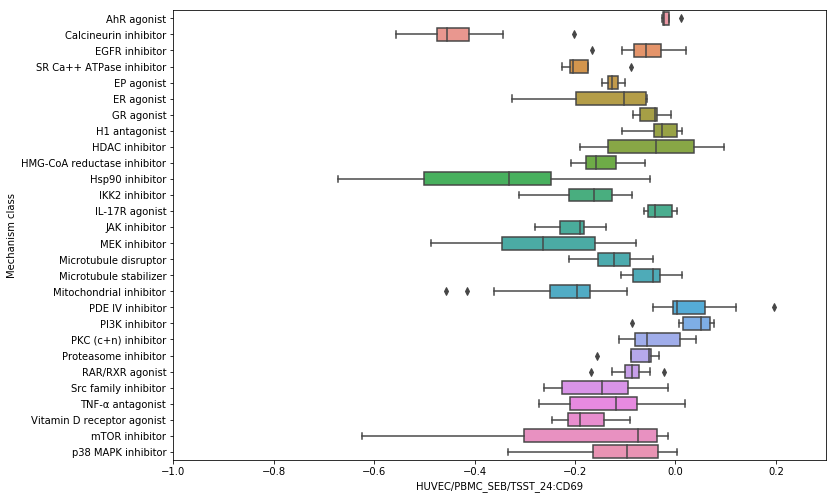

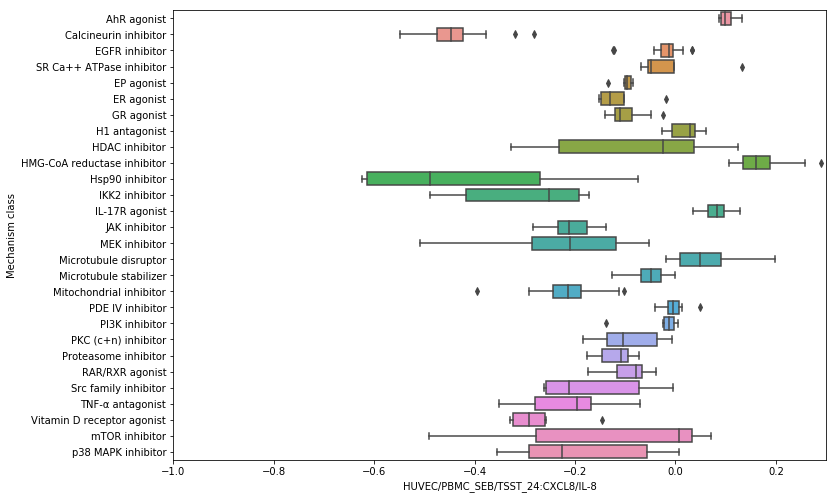

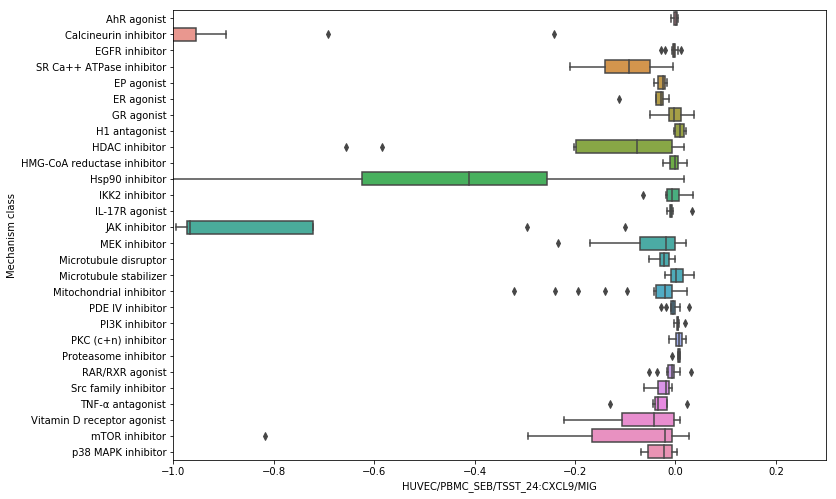

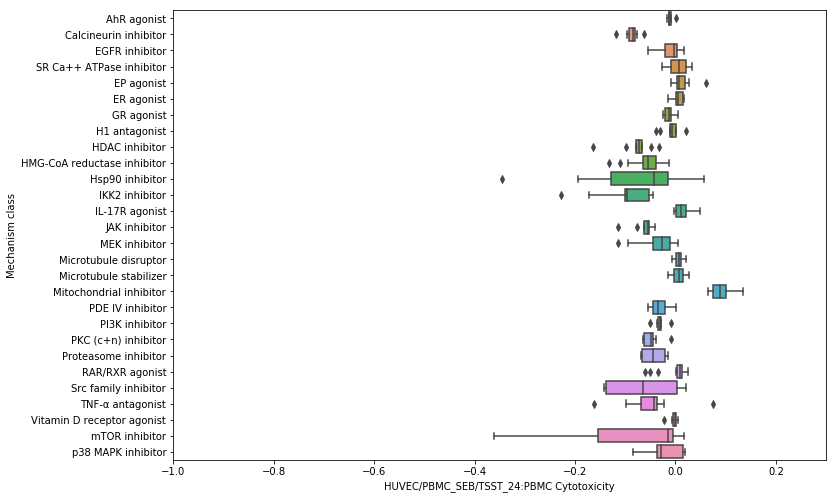

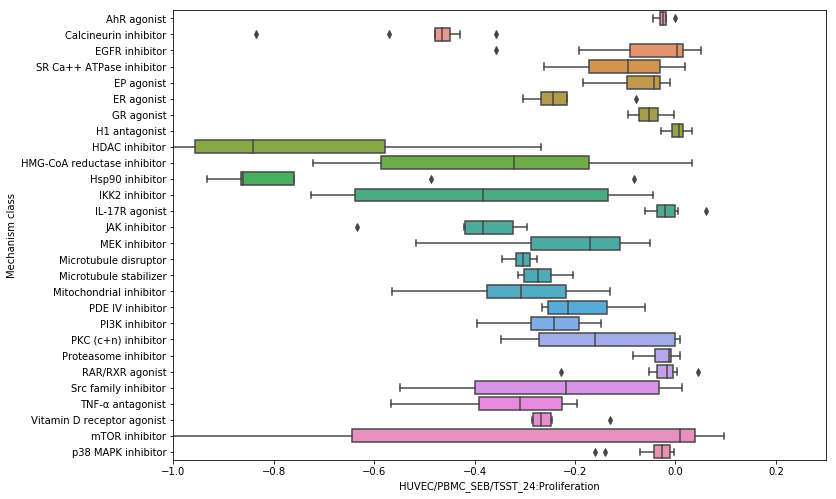

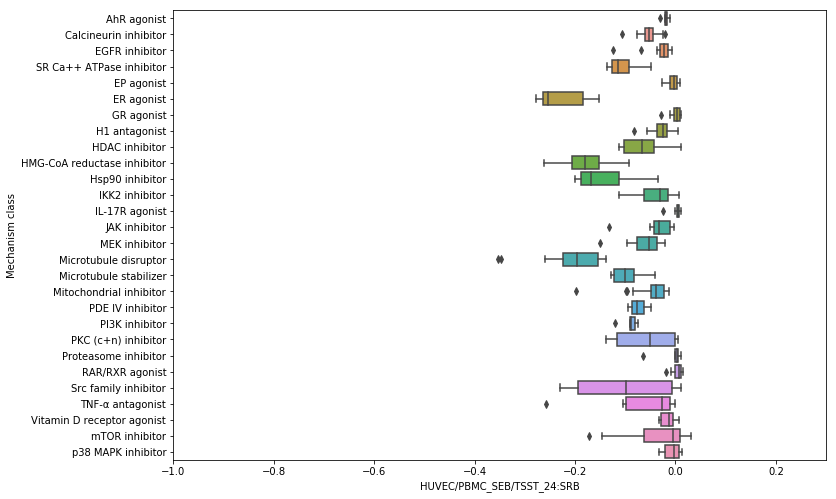

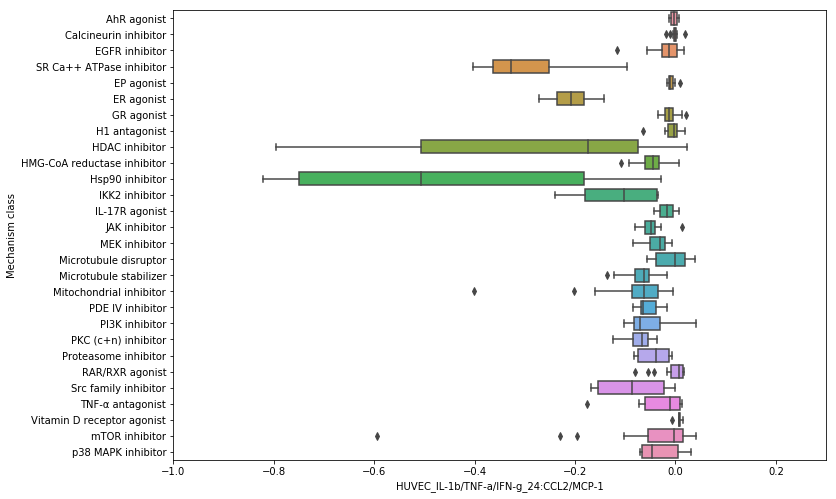

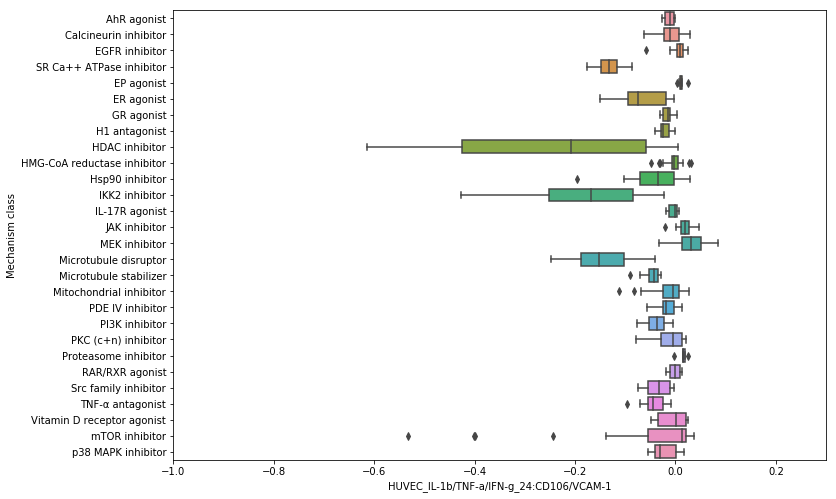

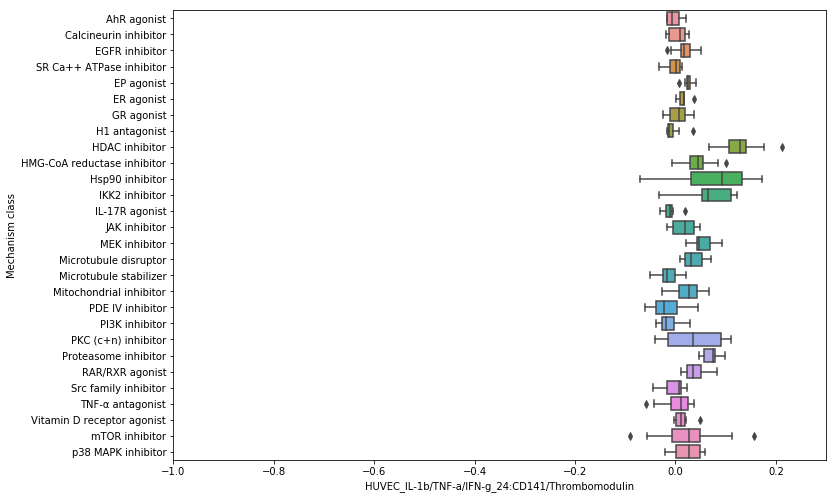

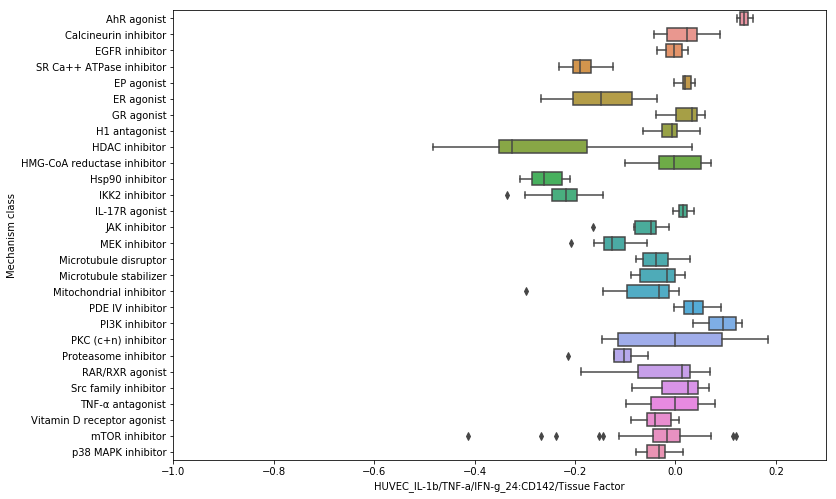

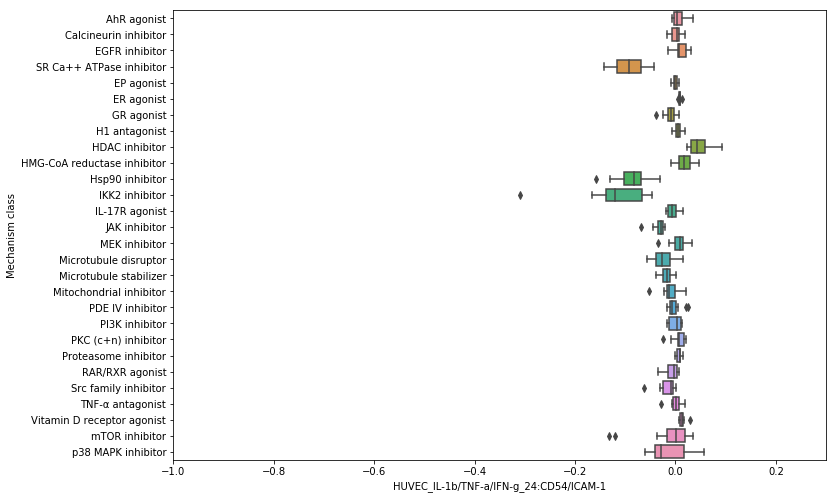

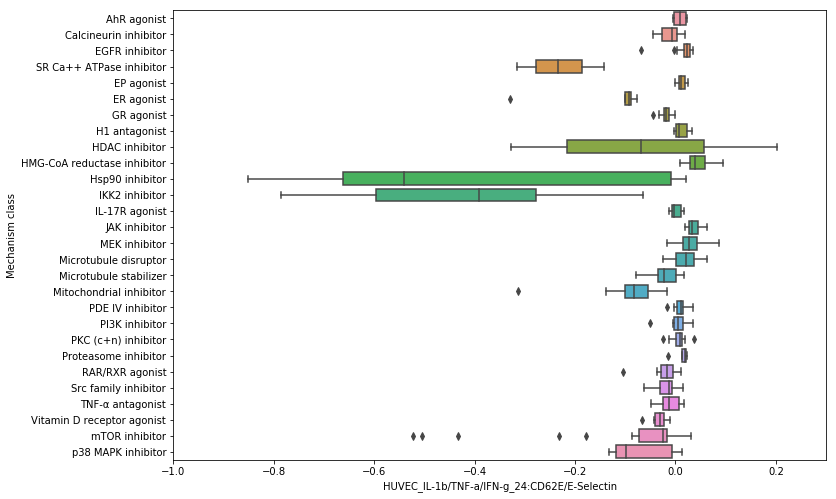

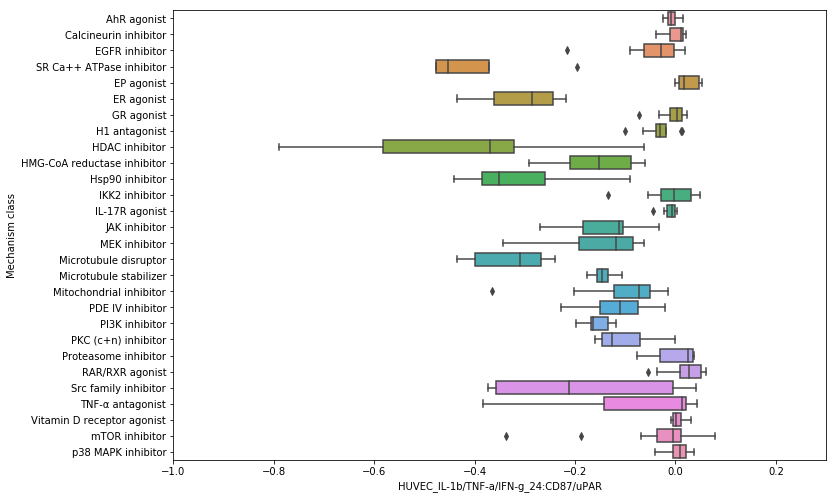

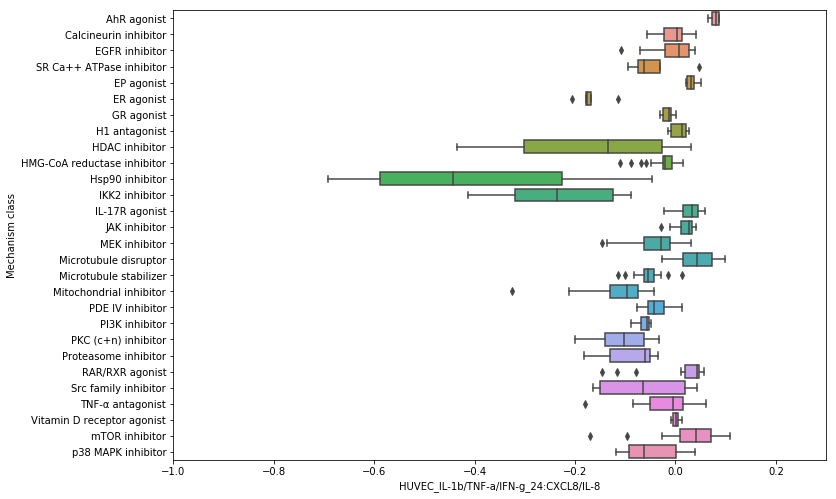

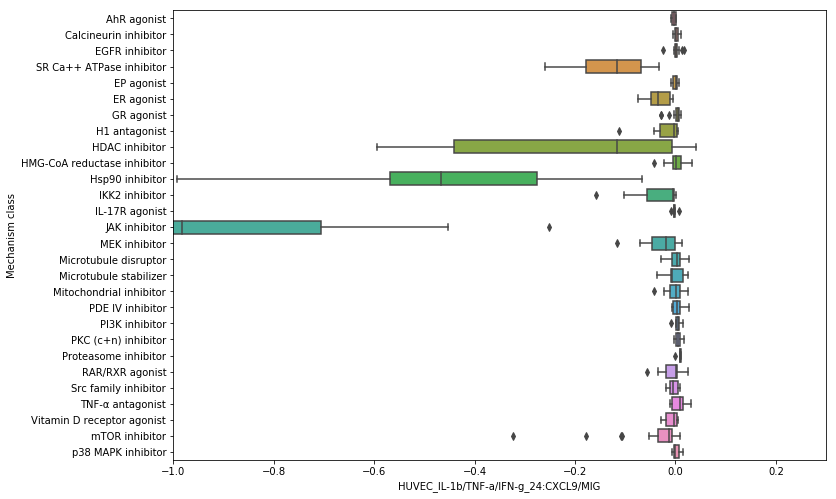

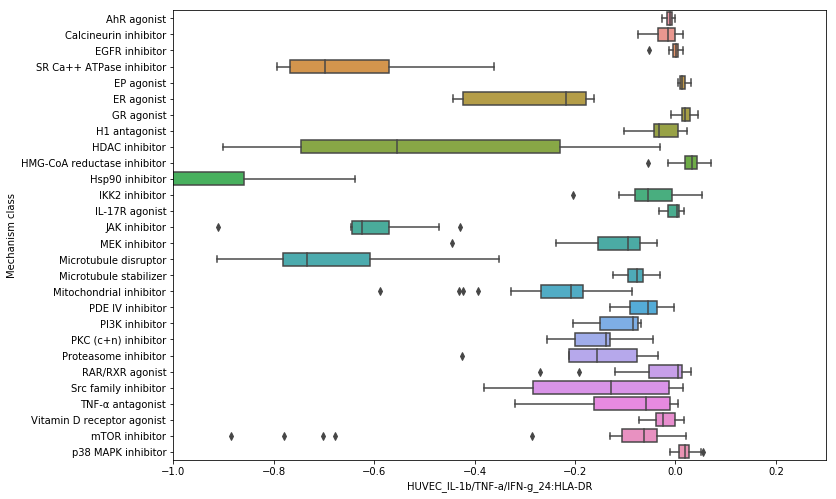

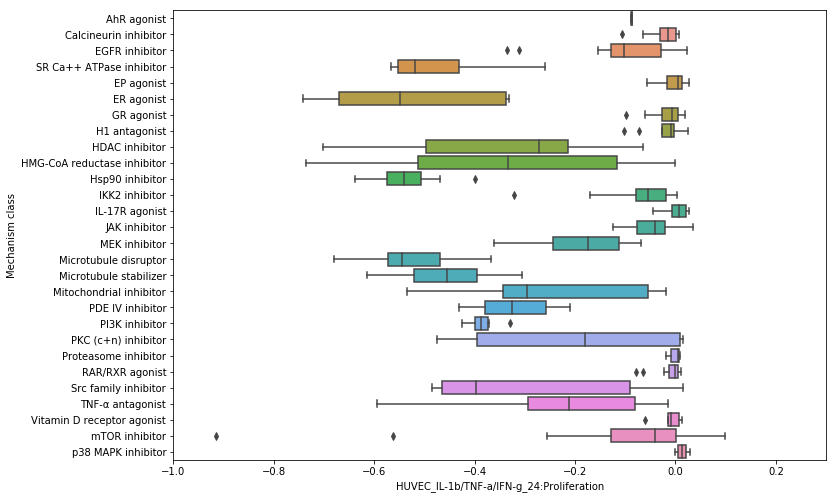

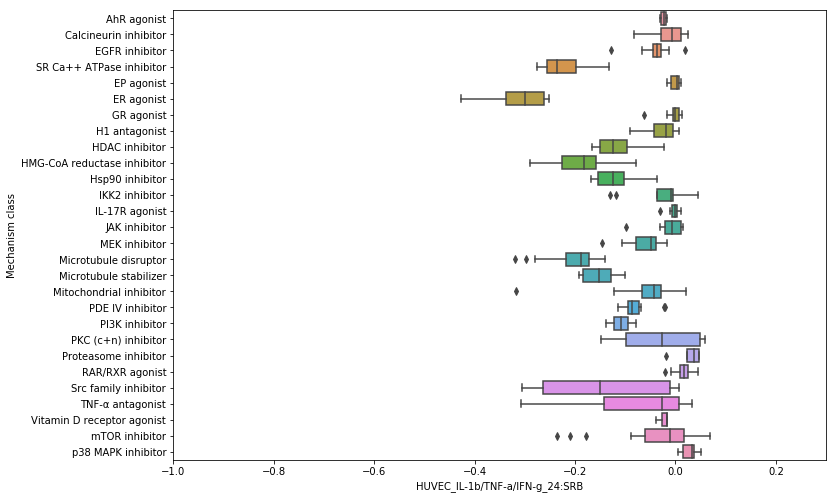

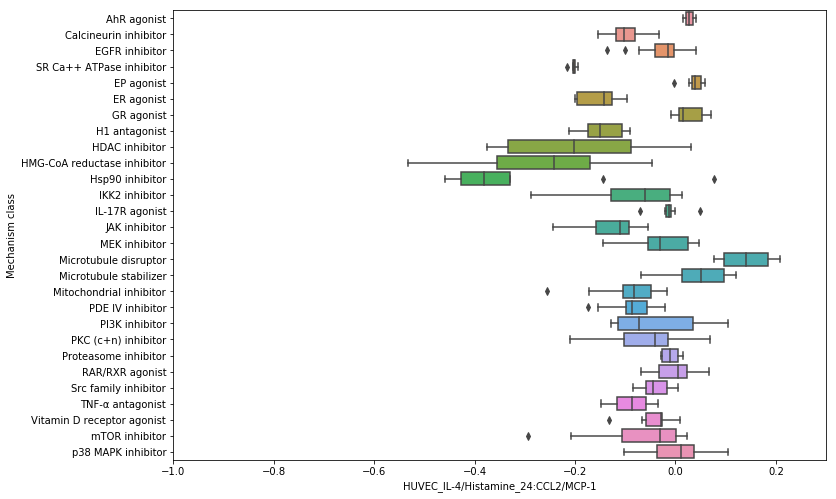

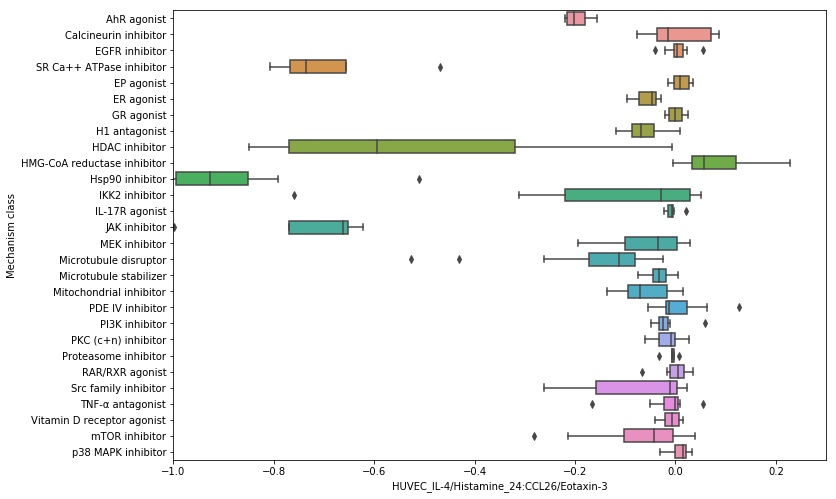

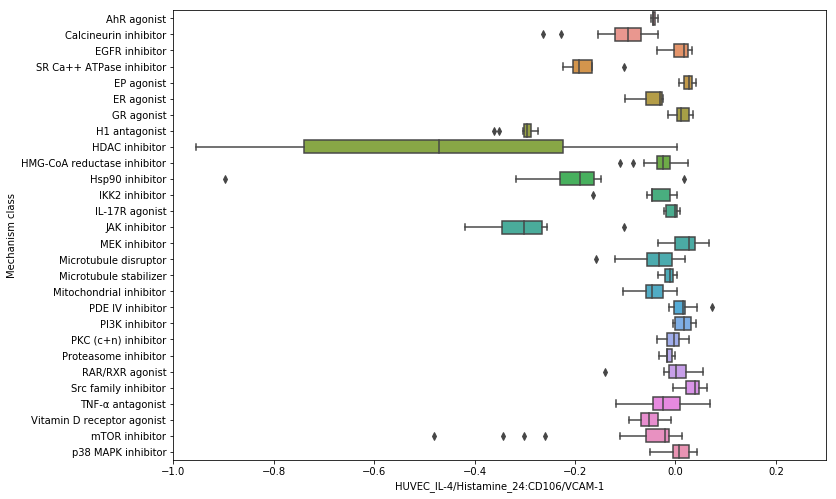

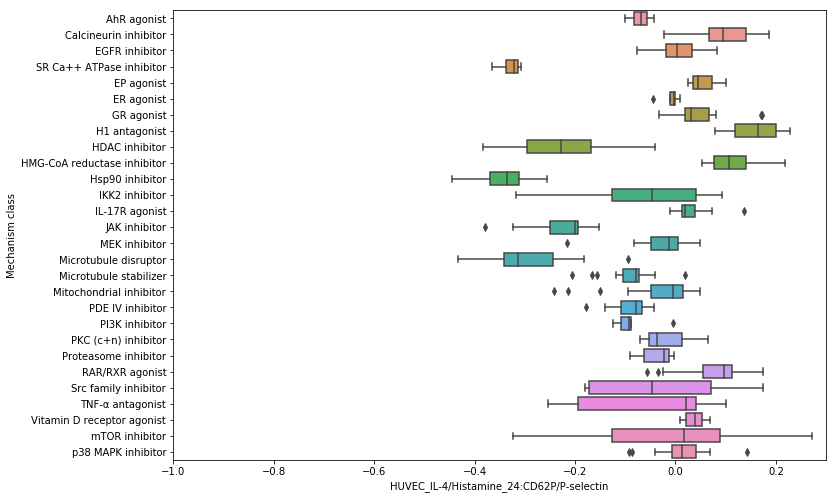

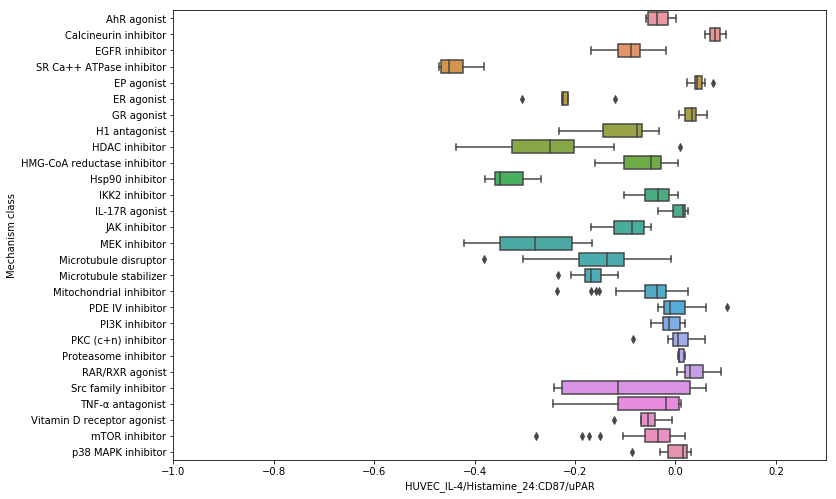

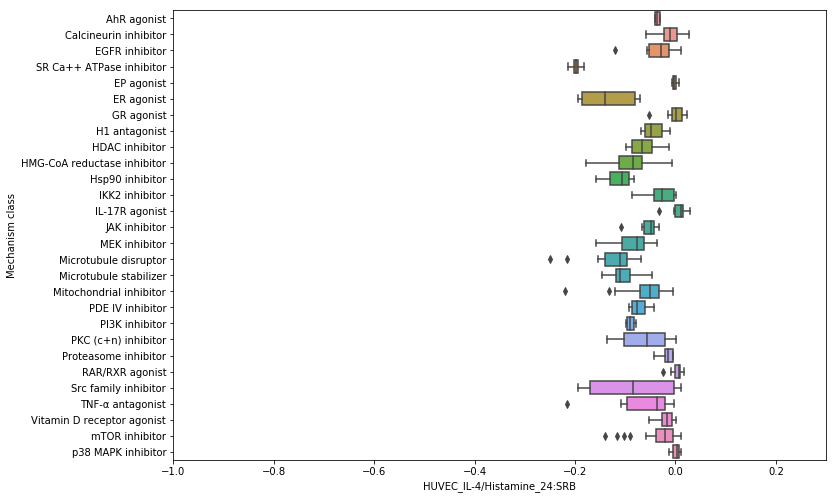

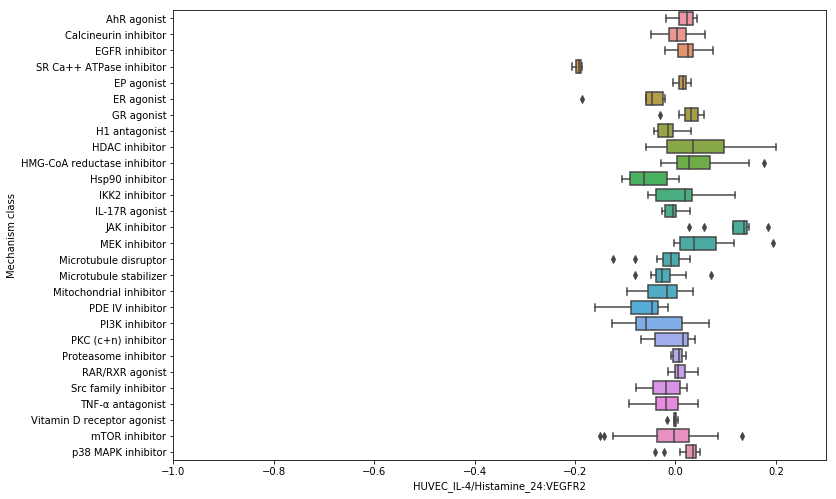

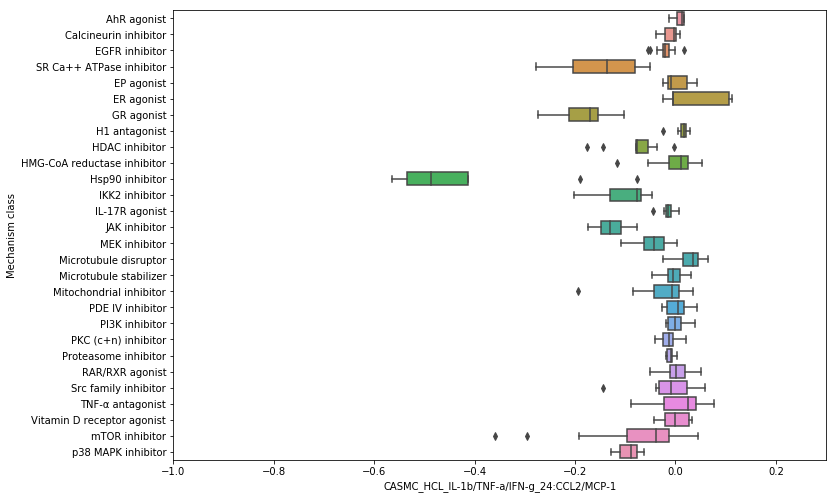

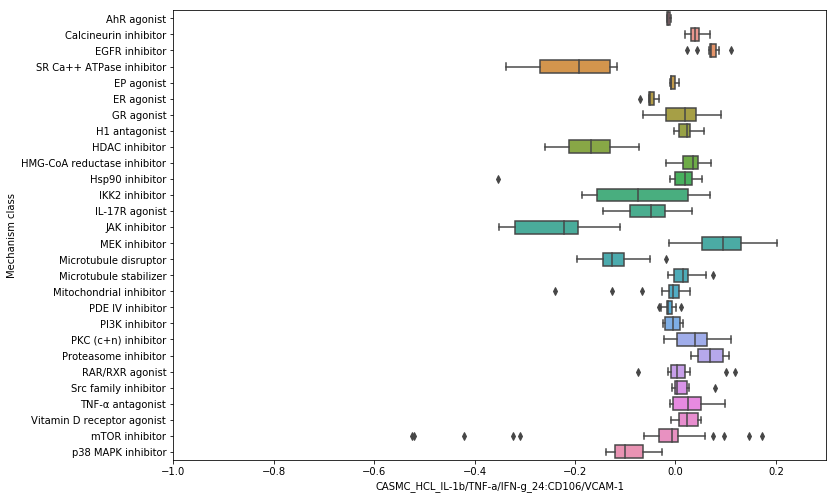

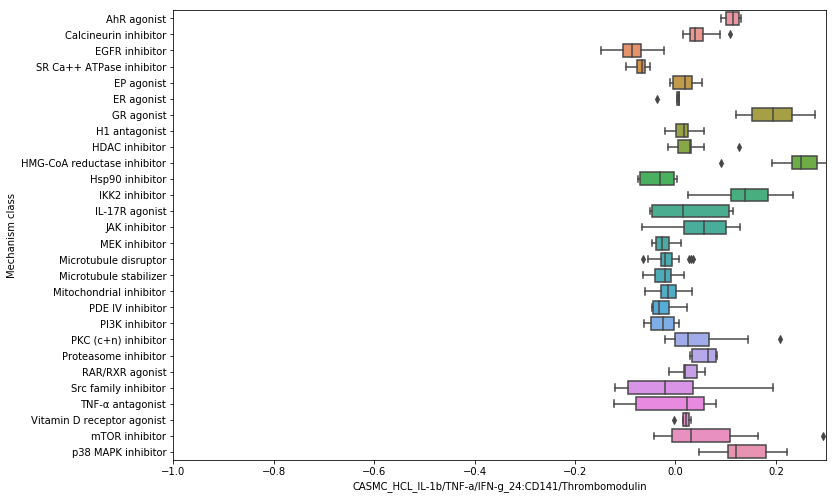

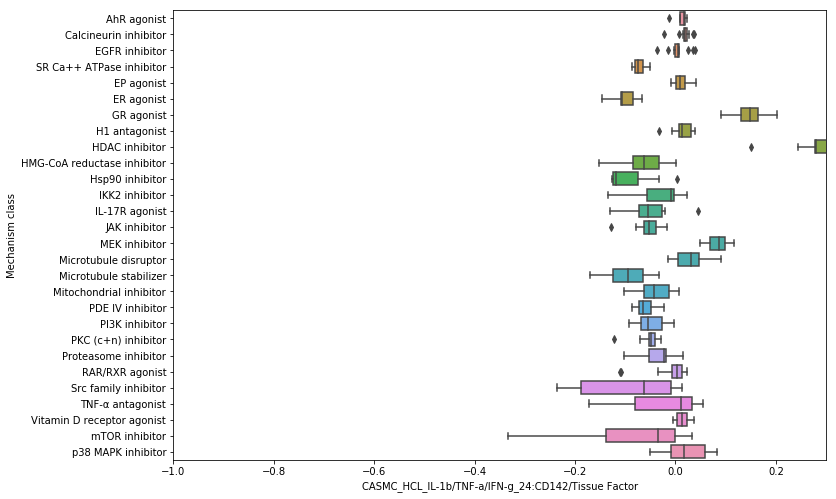

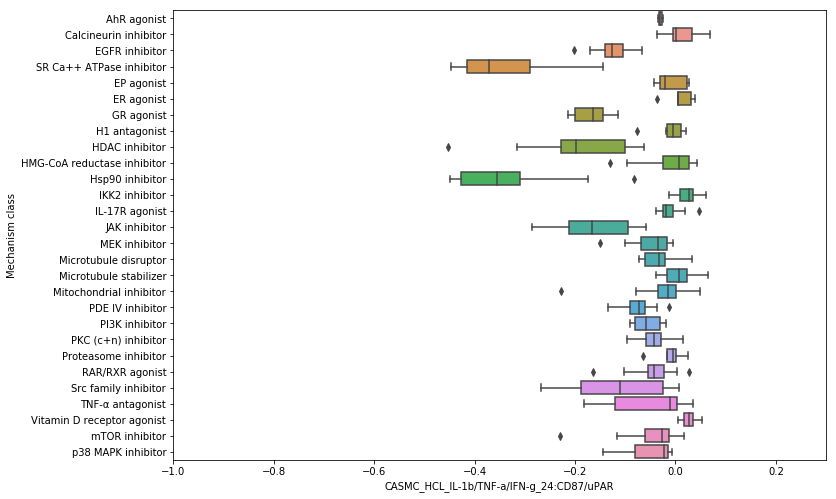

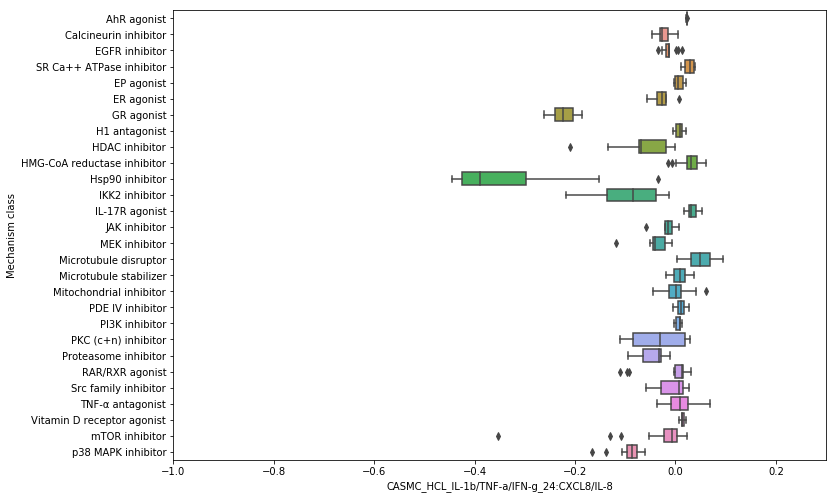

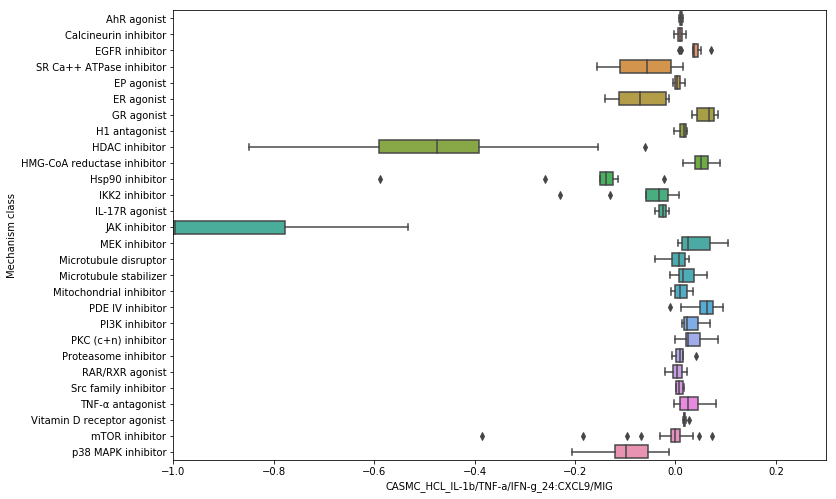

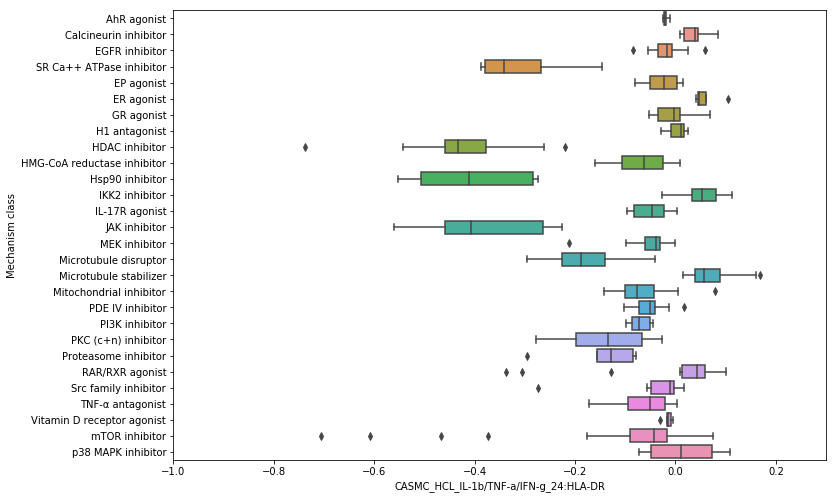

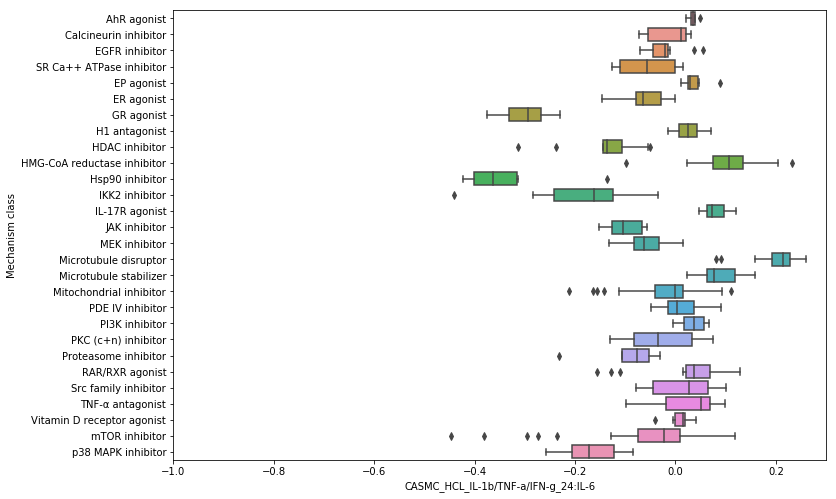

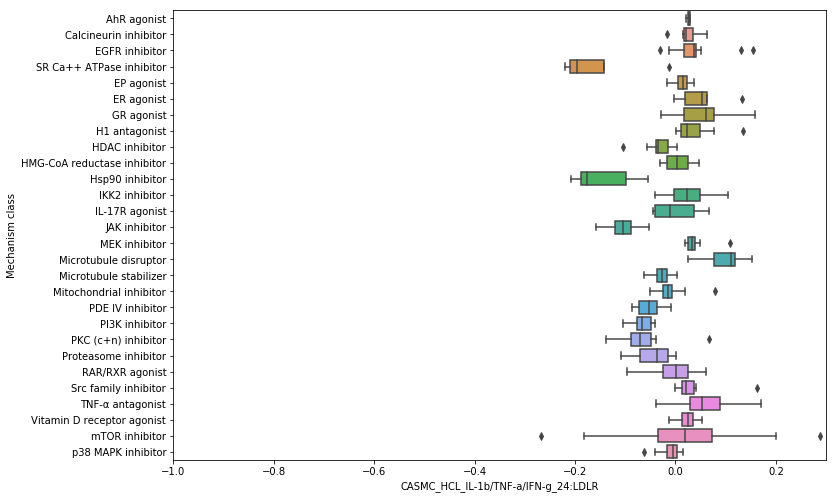

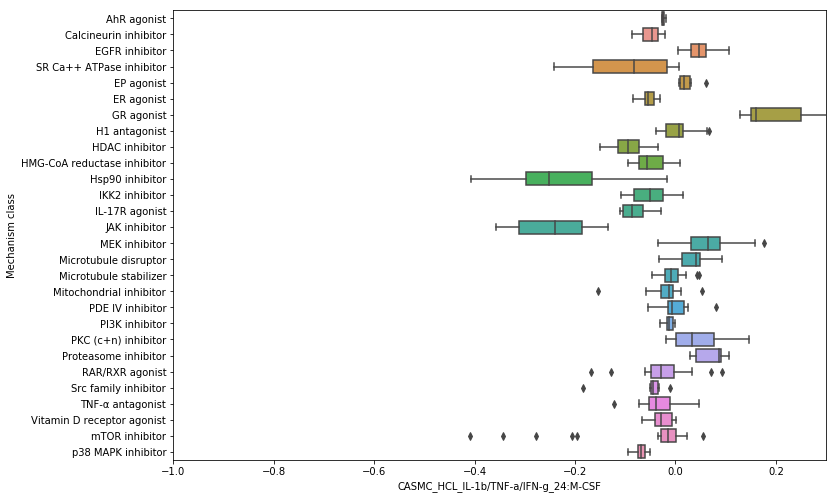

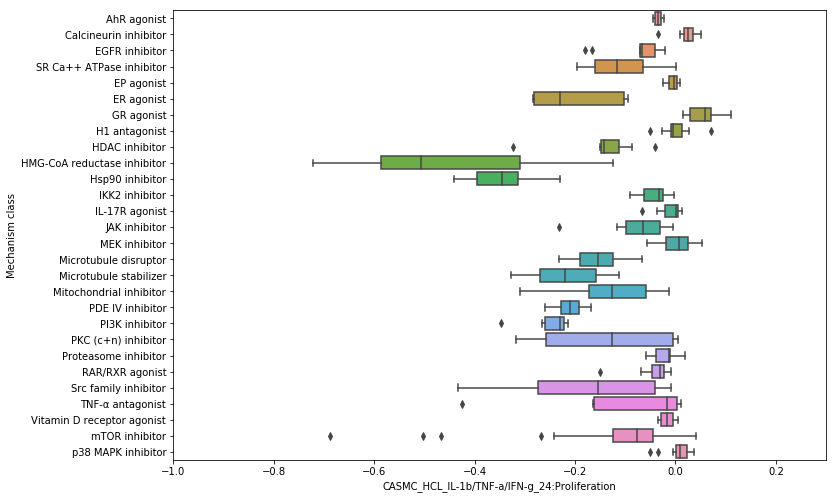

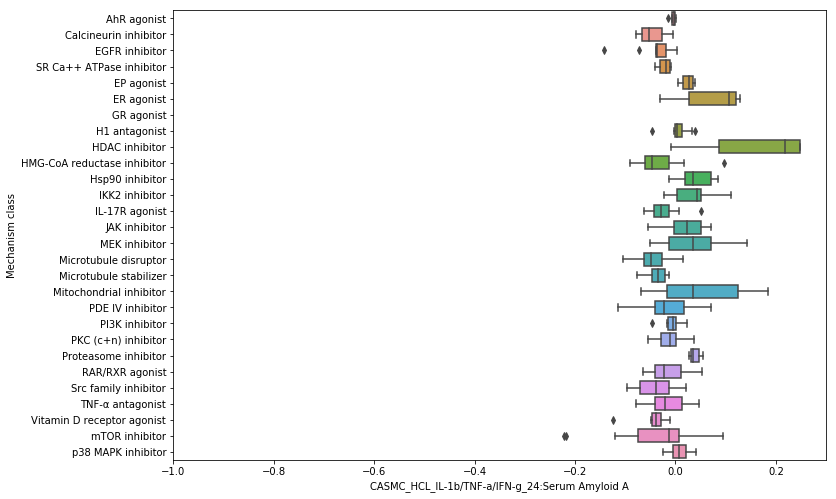

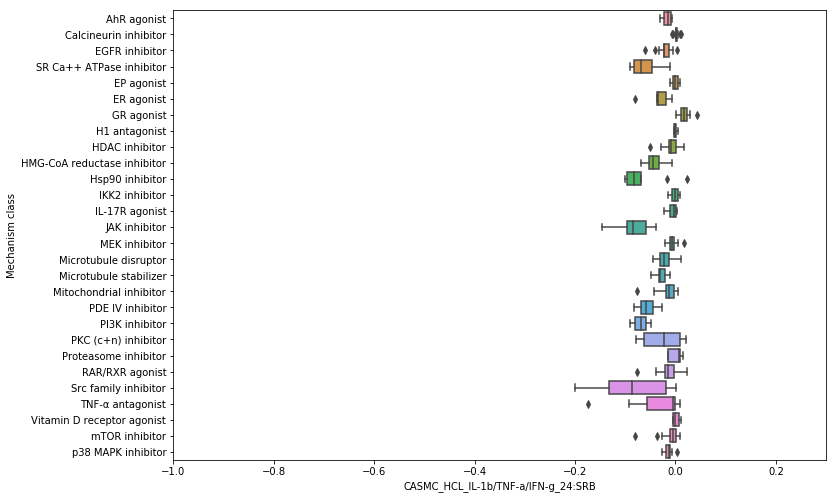

In [15]:
import matplotlib as mpl
mpl.rcParams['figure.max_open_warning'] = 100 # hide warnings for too many plots

for readout in data.columns.values:
    ro_data = pd.DataFrame(data[readout])
    ro_data['Mechanism class'] = data.index.get_level_values(0).values
    #display(ro_data.iloc[:3,])
    #ro_data.boxplot(column=readout, by='mech_col', )
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(11.7, 8.27)
    sns.boxplot(data=ro_data, 
            y='Mechanism class', x=readout);
    plt.xlim(-1, 0.3) # comment out if you don't want the same y-axis scale

    